In [36]:
# Source- https://www.youtube.com/watch?v=PujYNY6y8hY
# Import all the libraries
# For data manipulation
import numpy as np
import pandas as pd

# To plot
import matplotlib.pyplot as plt
#plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Getting live Data
import yfinance as yf

In [37]:
# Downloading live data
start = '2023-01-01'
end = '2024-08-23'
stock = 'GOOG'

data = yf.download(stock, start, end)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,89.830002,91.550003,89.019997,89.699997,89.598038,20738500
2023-01-04,91.010002,91.239998,87.800003,88.709999,88.609169,27046500
2023-01-05,88.070000,88.209999,86.559998,86.769997,86.671371,23136100
2023-01-06,87.360001,88.470001,85.570000,88.160004,88.059799,26612600
2023-01-09,89.195000,90.830002,88.580002,88.800003,88.699066,22996700
...,...,...,...,...,...,...
2024-08-16,163.410004,166.949997,163.080002,164.740005,164.740005,16853100
2024-08-19,167.000000,168.470001,166.089996,168.399994,168.399994,13100800
2024-08-20,168.740005,170.410004,168.660004,168.960007,168.960007,12622500


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 412 entries, 2023-01-03 to 2024-08-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       412 non-null    float64
 1   High       412 non-null    float64
 2   Low        412 non-null    float64
 3   Close      412 non-null    float64
 4   Adj Close  412 non-null    float64
 5   Volume     412 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 22.5 KB


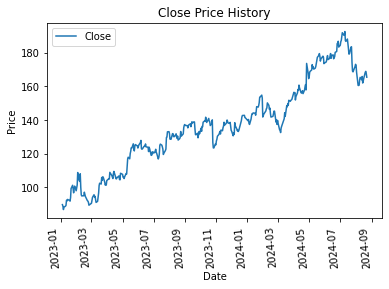

In [39]:
# Converting index to datetime format
data.index = pd.to_datetime(data.index)

# Plot the data
data.plot(y="Close")
plt.xticks(rotation=95)
plt.title('Close Price History')
plt.ylabel('Price')
plt.show()

In [40]:
# Creating the model
model = [LinearRegression(), RandomForestRegressor()]

In [41]:
# Train the model
X = data[["Open", "High", "Low", "Volume"]]
X = X[:int(len(data)-2)]
y = data['Close'].shift(-1)
y = y[:int(len(data)-2)]

for cls in model:
    cls.fit(X, y)

    # Testing the model
    print('The model score for '+ str(cls)+ ' is: ', cls.score(X,y)*100)

The model score for LinearRegression() is:  98.99753961170892
The model score for RandomForestRegressor() is:  99.83219315842724


In [42]:
# making precdictions
new_data = data[["Open", "High", "Low", "Volume"]].tail(2)[0:1]
for cls in model:
    prediction = cls.predict(new_data)

    print('The ' + str(cls) + ' model predicts the last day price to be: ', prediction)

print('The actual last day price is: ', data[['Close']].tail(1).values[0][0])

The LinearRegression() model predicts the last day price to be:  [167.86385562]
The RandomForestRegressor() model predicts the last day price to be:  [167.34100204]
The actual last day price is:  165.49000549316406
